TODO:


*   Rolling Mean



In [353]:
#Library Imports
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import datetime
import time
import numpy as np
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

font = {'family' : 'helvetica',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)

In [211]:
#CSV Import
dex_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/dex_data.csv', low_memory=False)
stable_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/stable_onchain_data_2021_July2022.csv', low_memory = False)
lend_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/lend_df.csv', low_memory = False)
stable_df = stable_df.sort_values(by=["date"])

In [212]:
dex_df[(dex_df['protocol']=='Uniswap')&
      (dex_df['pool_name']=='USDC/WETH')]

,date,protocol,chain,protocol_version,pool_name,token_1,token_1_balance,token_1_value_USD,token_2,token_2_balance,token_2_value_USD,token_3,token_3_balance,token_4,token_4_balance,daily_revenue,TVL,ideal
797,2021-01-01,Uniswap,Ethereum,V2,USDC/WETH,USDC,7.461330e+07,NaN,WETH,101168.064428,NaN,NaN,NaN,NaN,NaN,NaN,1.488823e+08,NaN
798,2021-01-01,Uniswap,Ethereum,V2,USDC/WETH,USDC,7.461330e+07,NaN,WETH,101168.064428,NaN,NaN,NaN,NaN,NaN,NaN,1.488823e+08,NaN
886,2021-01-01,Uniswap,Ethereum,V2,USDC/WETH,USDC,7.454581e+07,NaN,WETH,101262.290289,NaN,NaN,NaN,NaN,NaN,NaN,1.486954e+08,NaN
887,2021-01-01,Uniswap,Ethereum,V2,USDC/WETH,USDC,7.454581e+07,NaN,WETH,101262.290289,NaN,NaN,NaN,NaN,NaN,NaN,1.486954e+08,NaN
890,2021-01-01,Uniswap,Ethereum,V2,USDC/WETH,USDC,7.454298e+07,NaN,WETH,101262.290289,NaN,NaN,NaN,NaN,NaN,NaN,1.486935e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289474,2022-08-21,Uniswap,Polygon,V3,USDC/WETH,USDC,4.898435e+06,0.0,WETH,4254.786324,0.0,NaN,NaN,NaN,NaN,17190.787242,1.178385e+07,NaN
289477,2022-08-21,Uniswap,Polygon,V3,USDC/WETH,USDC,1.007286e+05,0.0,WETH,75.880851,0.0,NaN,NaN,NaN,NaN,169.931578,2.235510e+05,NaN
289512,2022-08-22,Uniswap,Ethereum,V2,USDC/WETH,USDC,5.694983e+07,NaN,WETH,35970.400911,NaN,NaN,NaN,NaN,NaN,NaN,1.138824e+08,NaN
289663,2022-08-22,Uniswap,Ethereum,V3,USDC/WETH,USDC,1.295250e+07,0.0,WETH,12605.049222,0.0,NaN,NaN,NaN,NaN,9302.731394,3.304667e+07,NaN


In [213]:
stable_token_list = stable_df.token.unique()

In [214]:
#Data Points to plot
# - Velocity[X], TVL[ ], utilization[ ], supply[X]
# MC = T/V -> V = T/MC

In [215]:
#Velocity
C = 1 #Stablecoin assumed to be $1
T = stable_df['Vol (Native)']
M = stable_df['supply_ntv'] #Monetary supply
stable_df['velocity'] = stable_df['Vol (Native)']/stable_df['supply_ntv']

In [216]:
token_1 = dex_df[(dex_df['token_1'].isin(stable_token_list))]

In [217]:
#THIS DOES NOT WORK AS THE PERCENTAGE BALANCE IS BEING ASSUMED
#TO FIX, NEED THE ACTUAL PRICES OF THE TOKENS 
token_1['token_2_value_USD'] = dex_df['token_1_balance']/0.5
#x*y = k -> k = 0.5, y = k/x

/var/folders/5m/h65pmmz91p78cnrgg_0v5v5c0000gn/T/ipykernel_68820/116722455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_1['token_2_value_USD'] = dex_df['token_1_balance']/0.5


In [218]:
FIGSIZE_X = 22
FIGSIZE_Y = 10
Tot = 3
Cols = 2

In [219]:
def plot_by_token(metric,ylim=None):

    Rows = Tot // Cols 

    if Tot % Cols != 0:
        Rows += 1

    Position = range(1,Tot + 1)

    fig = plt.figure(1,figsize=(FIGSIZE_X,FIGSIZE_Y))

    chains = ['avalanche','ethereum','polygon']
    #metric = 'supply_ntv'

    for k in range(Tot):

      # add every single subplot to the figure with a for loop
        curr_chain = chains[k]
        #fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
        temp_df = stable_df[stable_df['chain']==curr_chain]
        temp_df.set_index('date', inplace = True)
        temp_df = temp_df.groupby('token')[metric]
        ax = temp_df.plot(ax=fig.add_subplot(Rows,Cols,Position[k]),legend=True)
        plt.xlabel('Date')
        plt.ylabel(metric)
        plt.title(curr_chain + ' ' + metric)
        plt.grid()
        plt.ylim(ylim)
        #ax.set_xlim('2022-05-06','2022-06-01')
    plt.show()


In [245]:
def plot_agg_stable(metric):

    Rows = Tot // Cols 

    if Tot % Cols != 0:
        Rows += 1

    Position = range(1,Tot + 1)

    fig = plt.figure(1,figsize=(FIGSIZE_X,FIGSIZE_Y))

    chains = ['avalanche','ethereum','polygon']
    #metric = '# TXs'

    for k in range(Tot):

      # add every single subplot to the figure with a for loop
        curr_chain = chains[k]
        #fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
        temp_df = stable_df[stable_df['chain']==curr_chain]
        temp_df = temp_df[['date',metric]].groupby('date').agg(['sum']).reset_index()
        ax = temp_df.plot(x = 'date', y=metric,ax=fig.add_subplot(Rows,Cols,Position[k]))
        ax.set_xlabel('Date')
        ax.set_ylabel(metric)
        ax.set_title(curr_chain + ' ' + metric)
        ax.grid()
        #ax.set_xlim('2022-05-06','2022-06-01')
    plt.show()


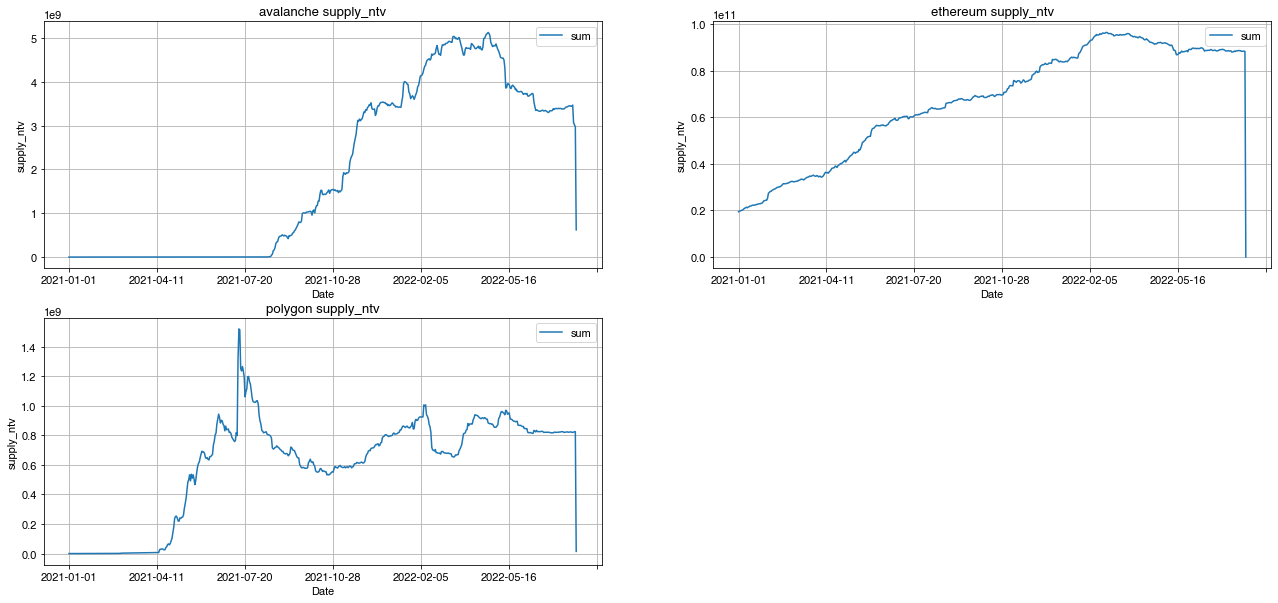

In [221]:
plot_agg('supply_ntv')

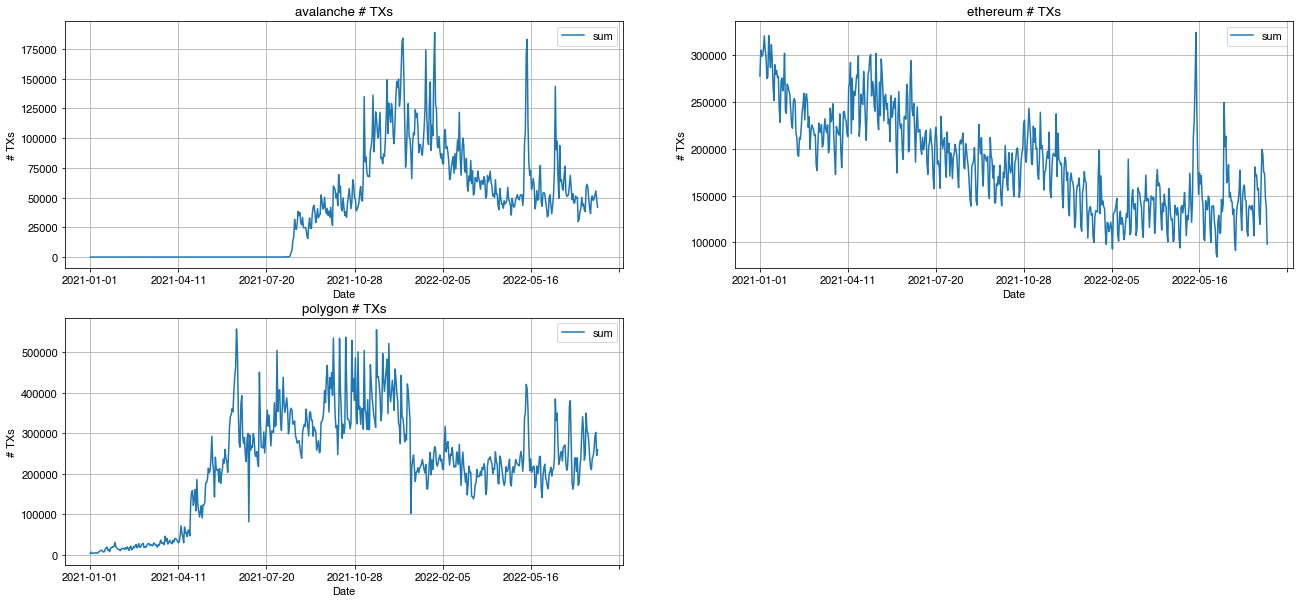

In [222]:
plot_agg('# TXs')

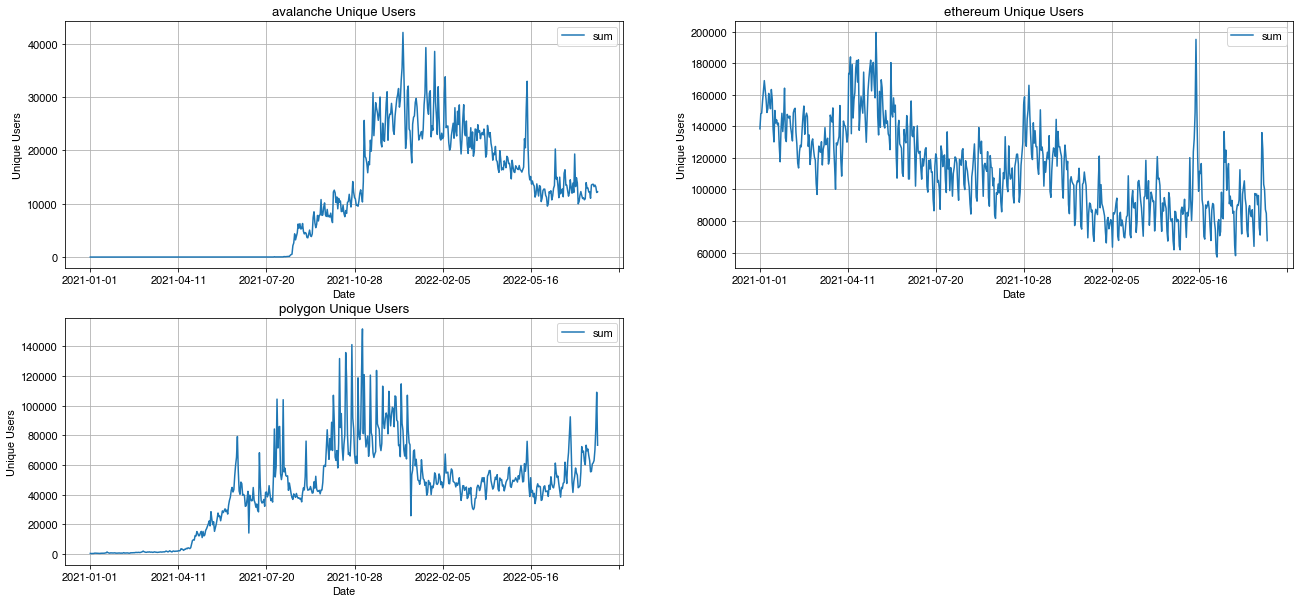

In [223]:
plot_agg('Unique Users')

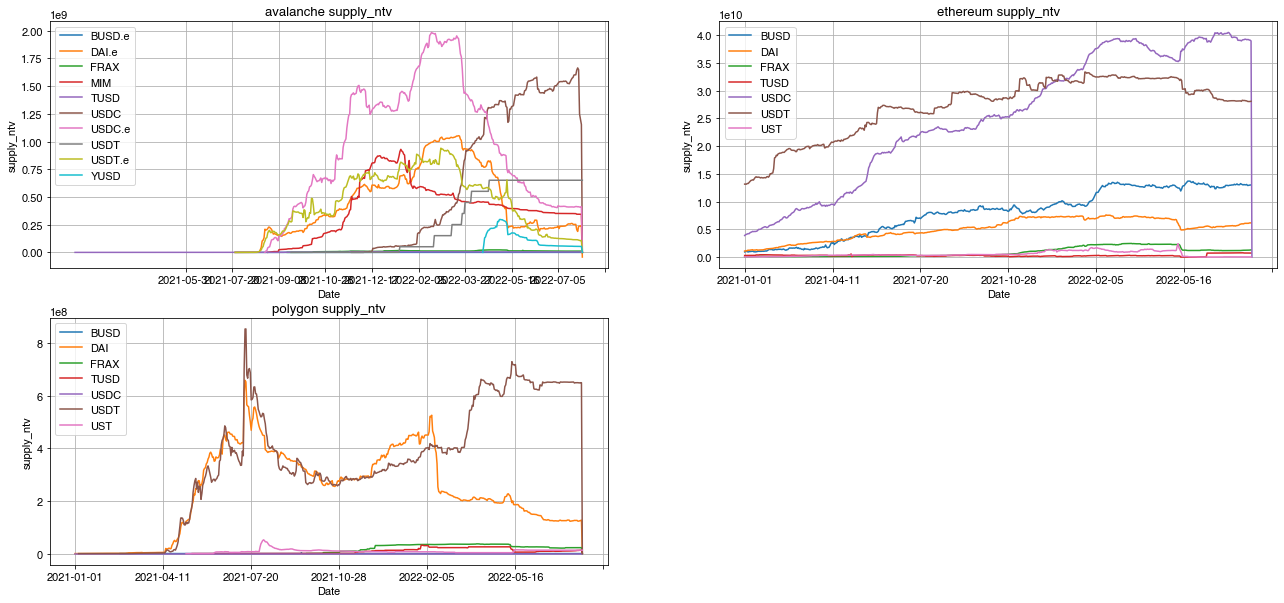

In [224]:
plot_by_token('supply_ntv')

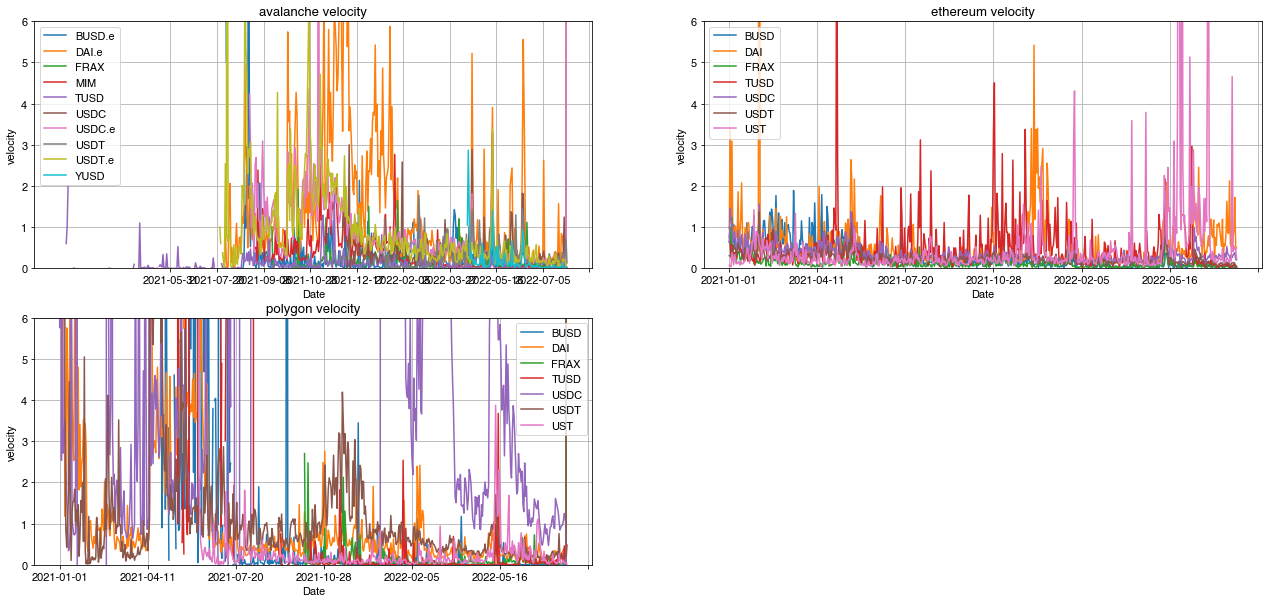

In [225]:
plot_by_token('velocity',[0,6]) #NEED TO ADD A ROLLING MEAN HERE

<AxesSubplot:xlabel='date'>

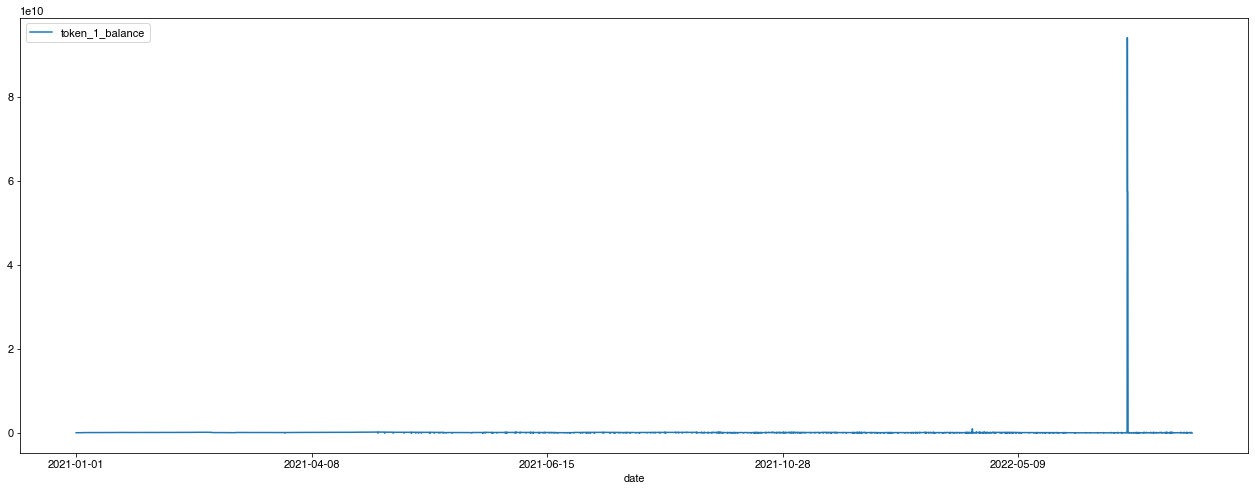

In [226]:
df = token_1
temp_df = df[(df['chain']=='Ethereum') & (df['protocol']=='Uniswap') & (df['pool_name']=='USDC/WETH')]
temp_df.plot(x='date',y='token_1_balance',figsize=(22,8))

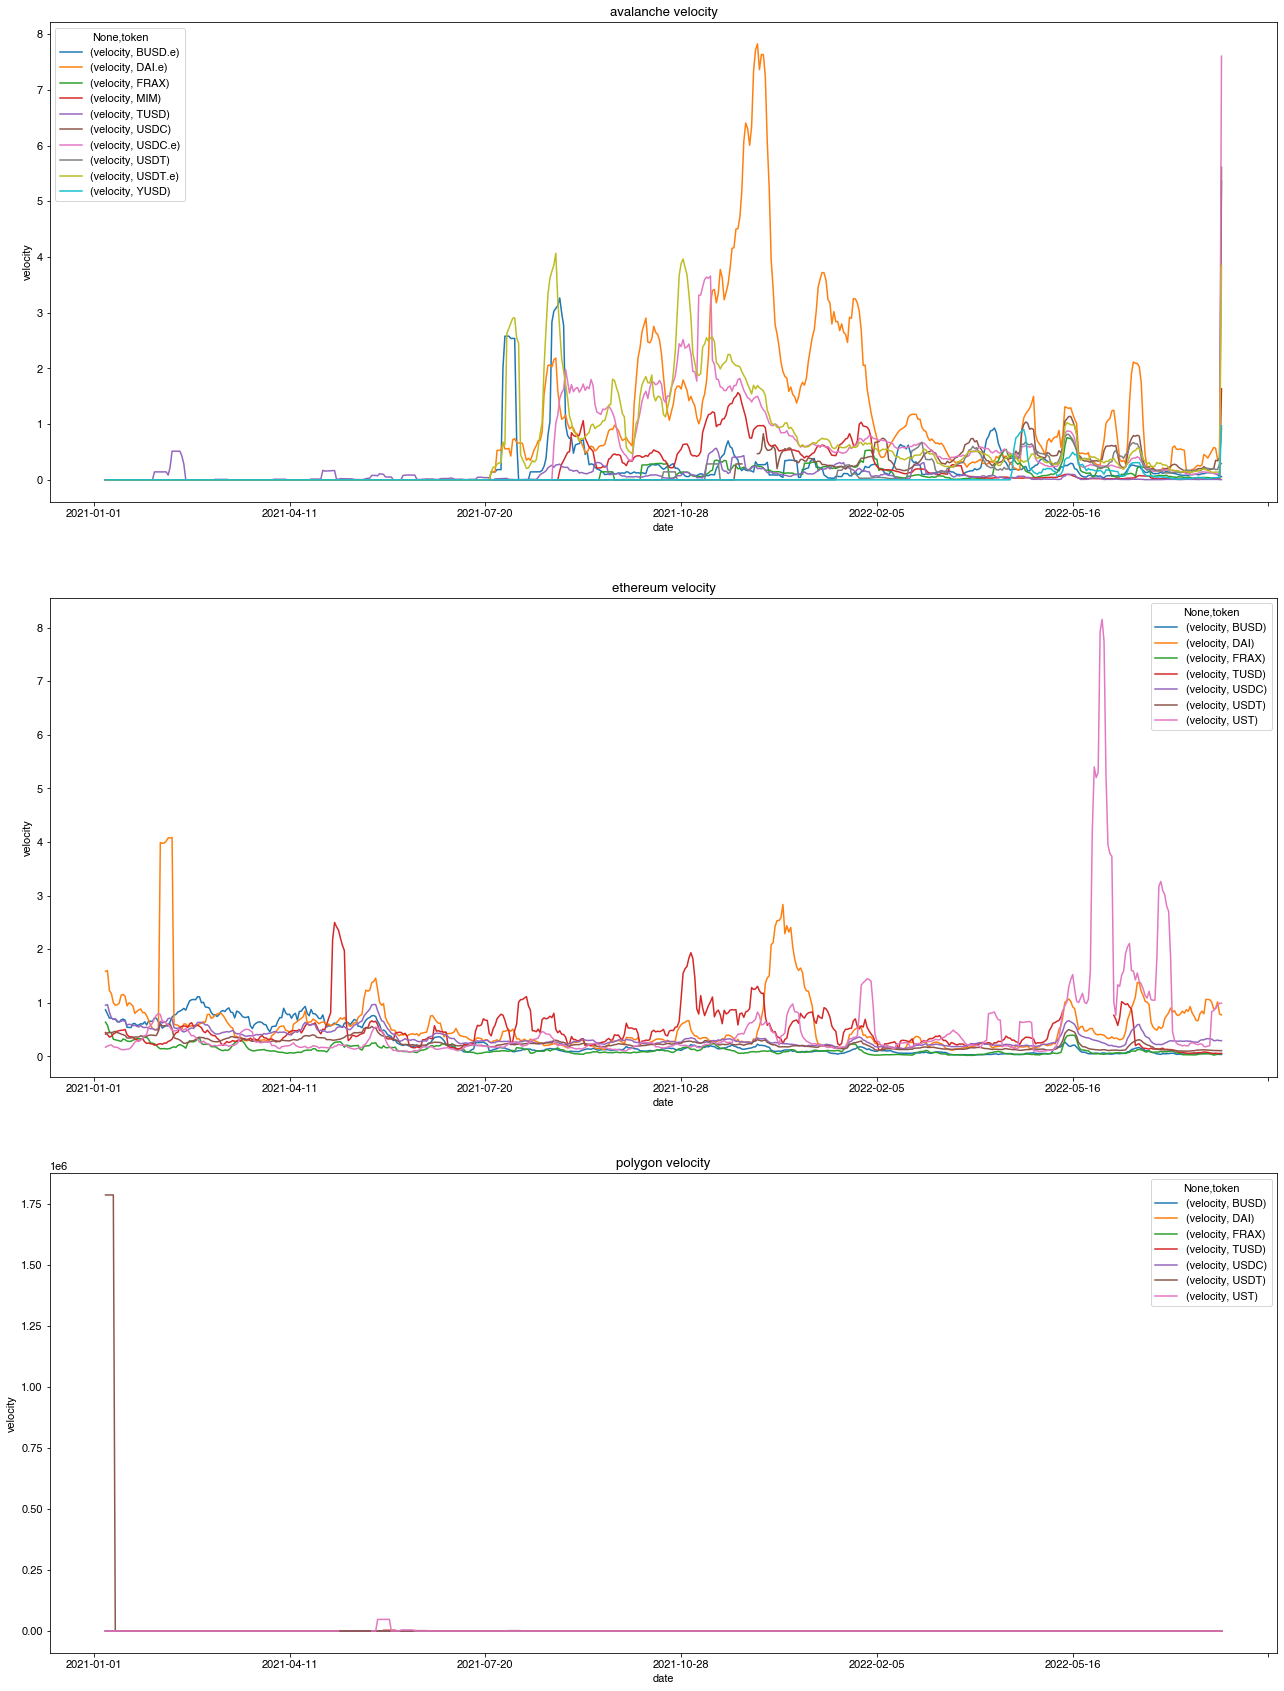

In [227]:
#Velocity
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
subplots_vel = [ax1,ax2,ax3]
chains = ['avalanche','ethereum','polygon']
#fig = plt.figure(figsize=(22,8))
for k in range(3):
    curr_chain = chains[k]
    velocity_df = stable_df[stable_df['chain']==curr_chain] 
    velocity_df = velocity_df.groupby(['date','token'])['velocity'].sum().to_frame().unstack(level=1).abs() 
    velocity_df.rolling(7).mean().plot(ax = subplots_vel[k],title=curr_chain+' velocity',ylabel='velocity')

In [228]:
lend_df['borrows/deposits']=lend_df['totalBorrowBalanceUSD']/lend_df['totalDepositBalanceUSD']

<AxesSubplot:xlabel='date'>

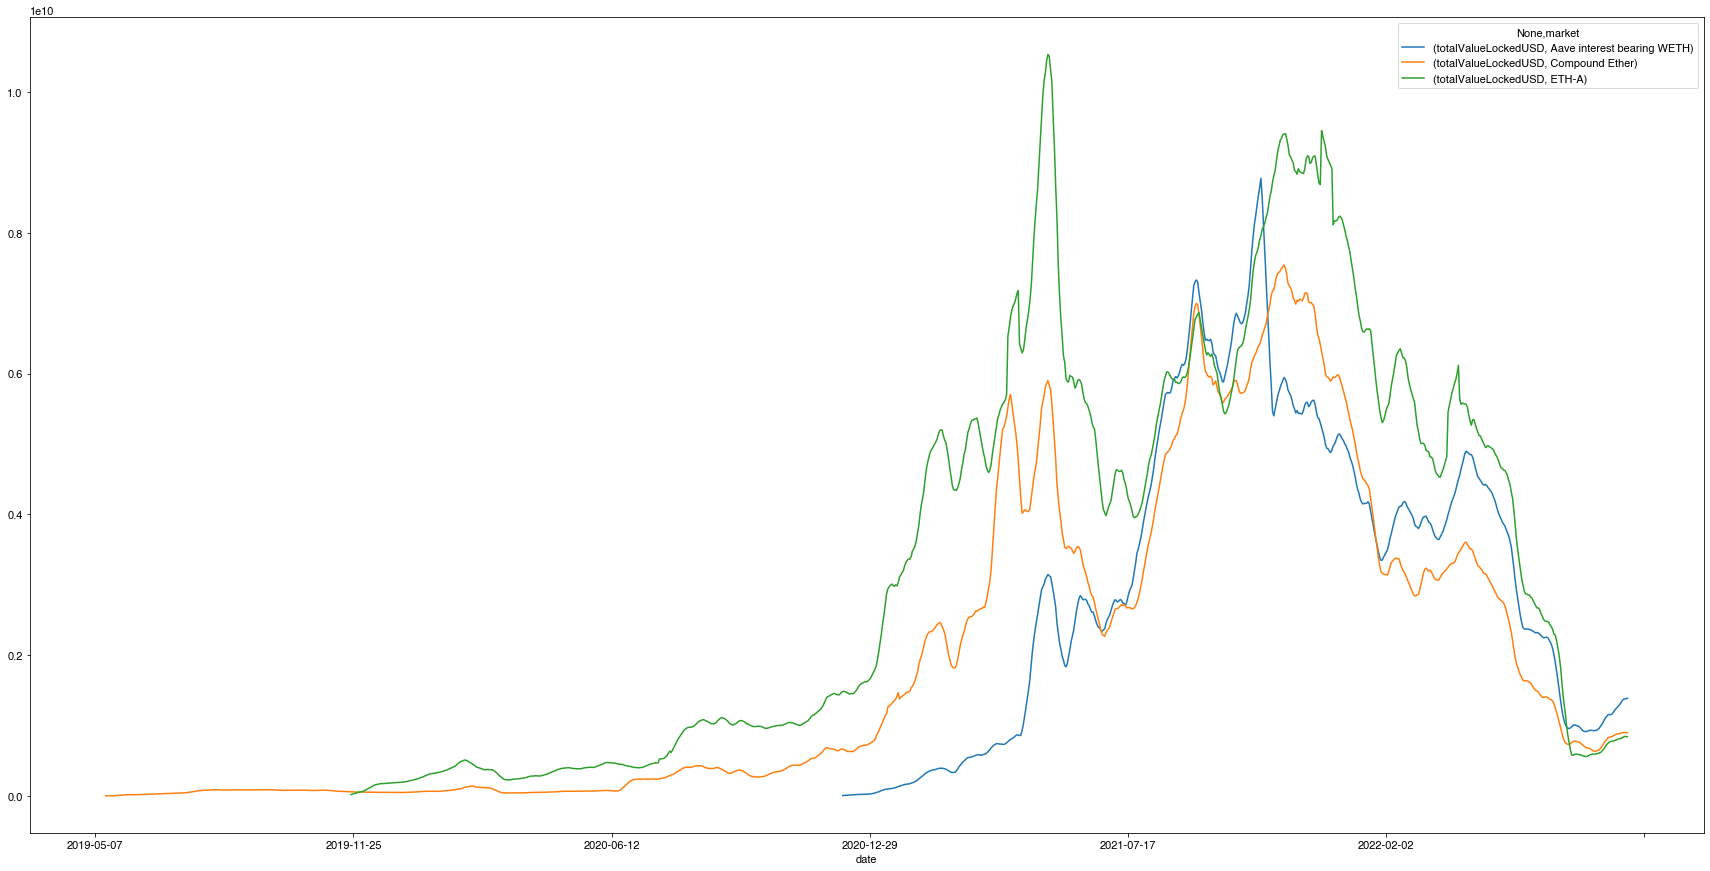

In [229]:
metric = 'totalValueLockedUSD'
curr_df = lend_df[(lend_df['chain']=='Ethereum') &
                 (lend_df[metric]>6e9)]
curr_df = curr_df.groupby(['date','market'])[metric].sum().to_frame().unstack(level=1).abs()
col_vals = curr_df.columns.values
top_markets = ['']*len(col_vals)
for k in range(len(col_vals)):
    top_markets[k] = col_vals[k][1]
curr_df = lend_df[lend_df['market'].isin(top_markets)]
curr_df = curr_df.groupby(['date','market'])[metric].sum().to_frame().unstack(level=1).abs()
curr_df.rolling(9).mean().plot(figsize=(30,15))

In [230]:
def plot_agg_lending(metric):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
    fig 
    subplots = [ax1,ax2,ax3]
    chains = ['Avalanche','Ethereum','Polygon']
    for k in range(3):
        curr_chain=chains[k]
        curr_df = lend_df[(lend_df['chain']==curr_chain)]
        curr_df = curr_df.groupby(['date'])[metric].sum().to_frame().unstack(level=1).abs()
        curr_df.rolling(5).mean().plot(figsize=(30,30),ax=subplots[k],title = curr_chain+' '+metric)
        subplots[k].grid()

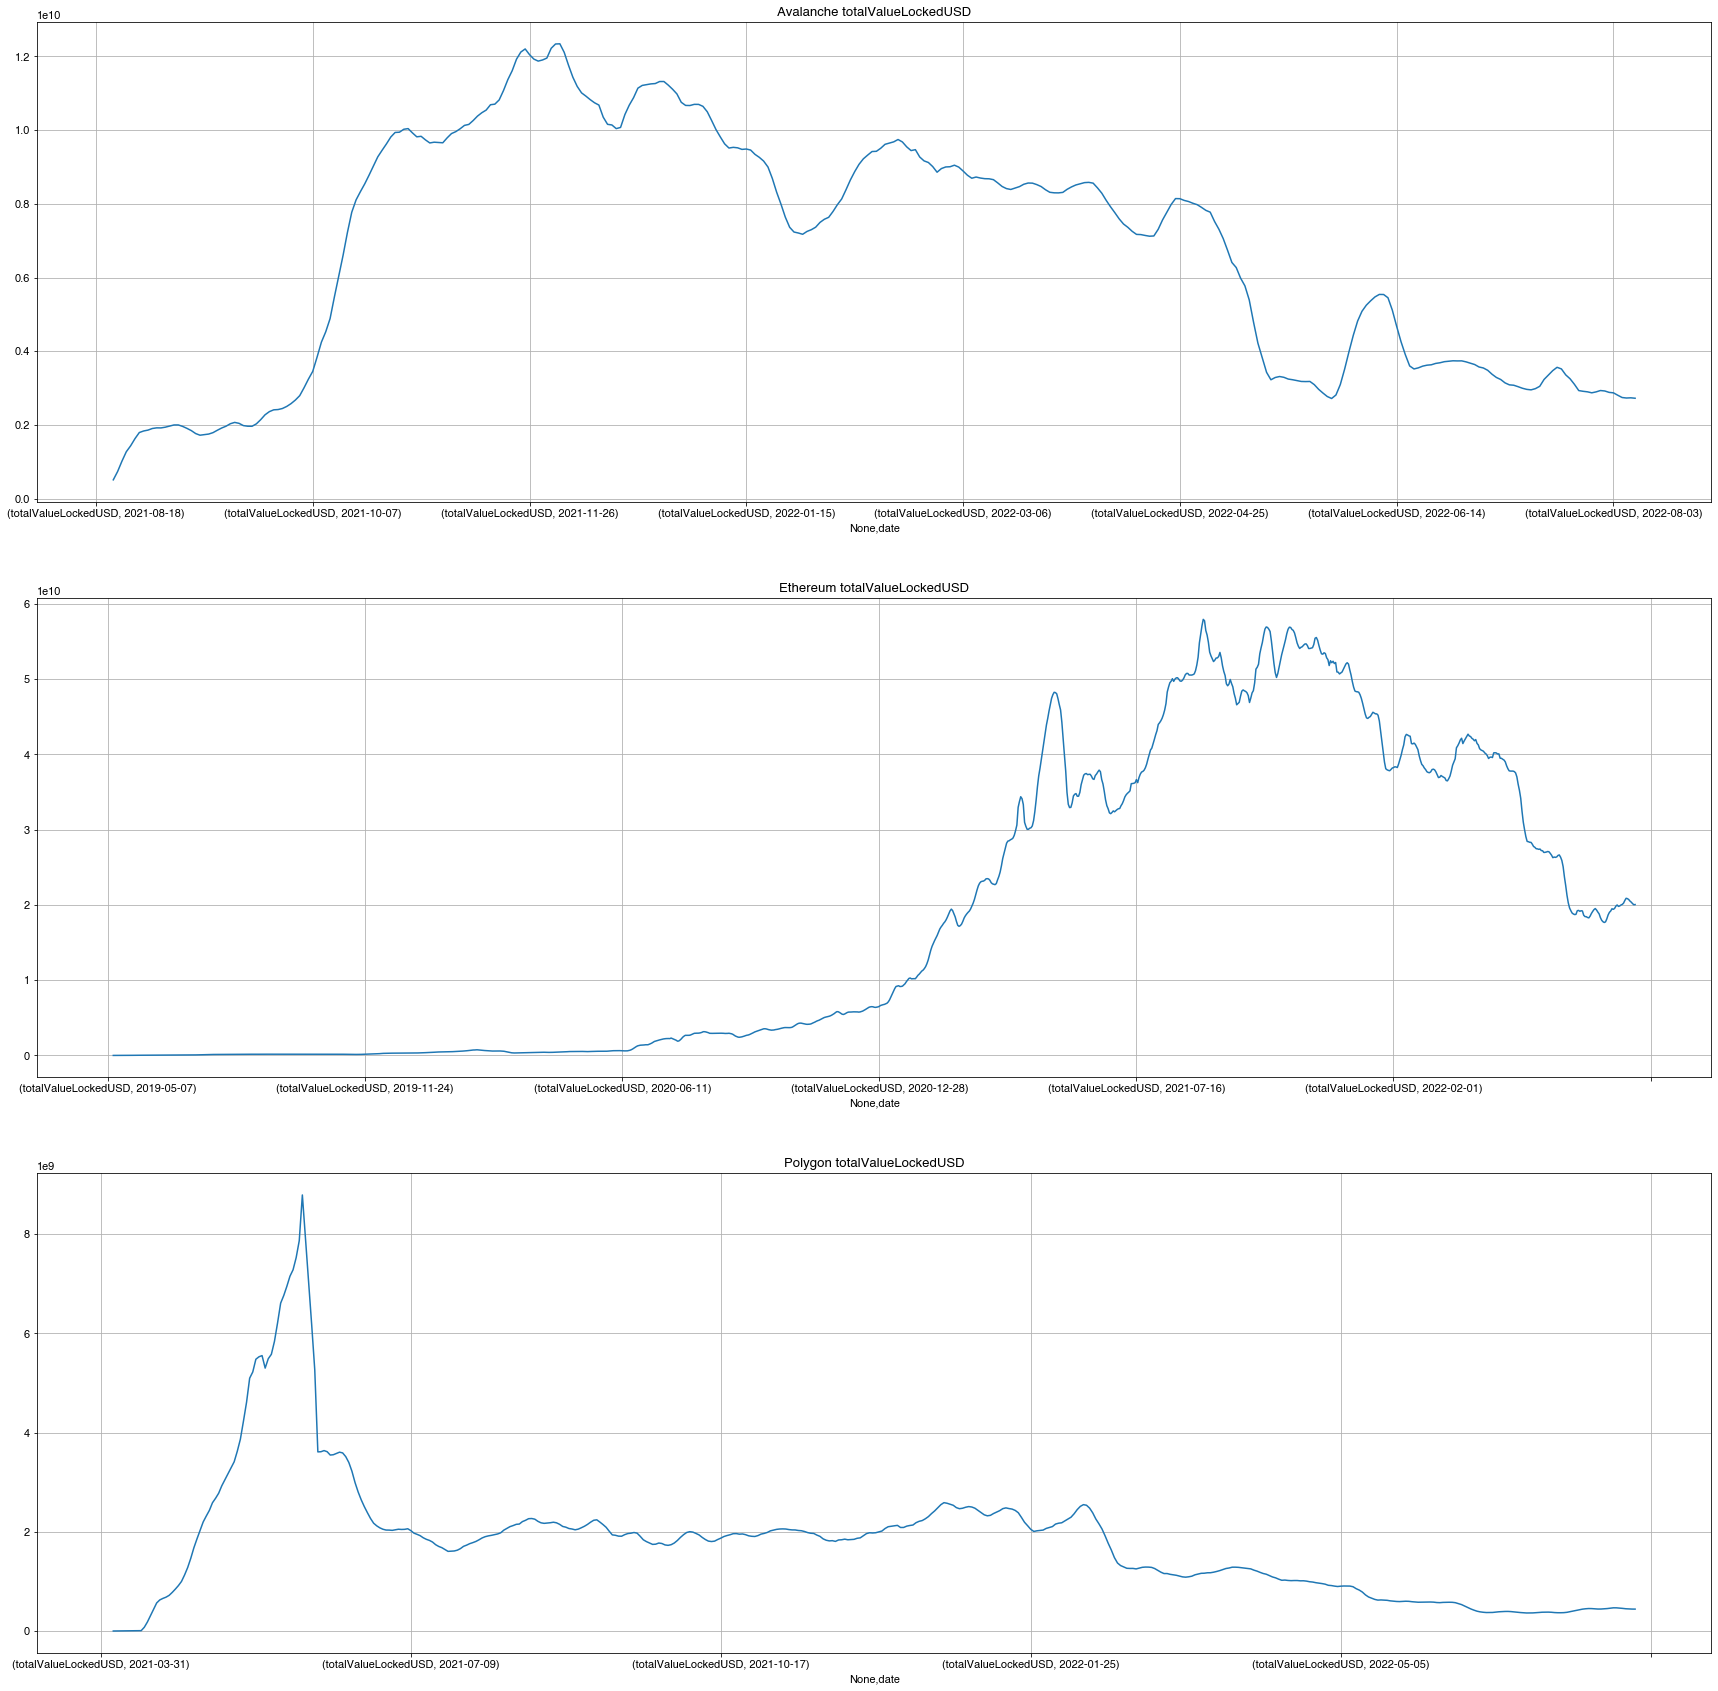

In [231]:
plot_agg_lending('totalValueLockedUSD')

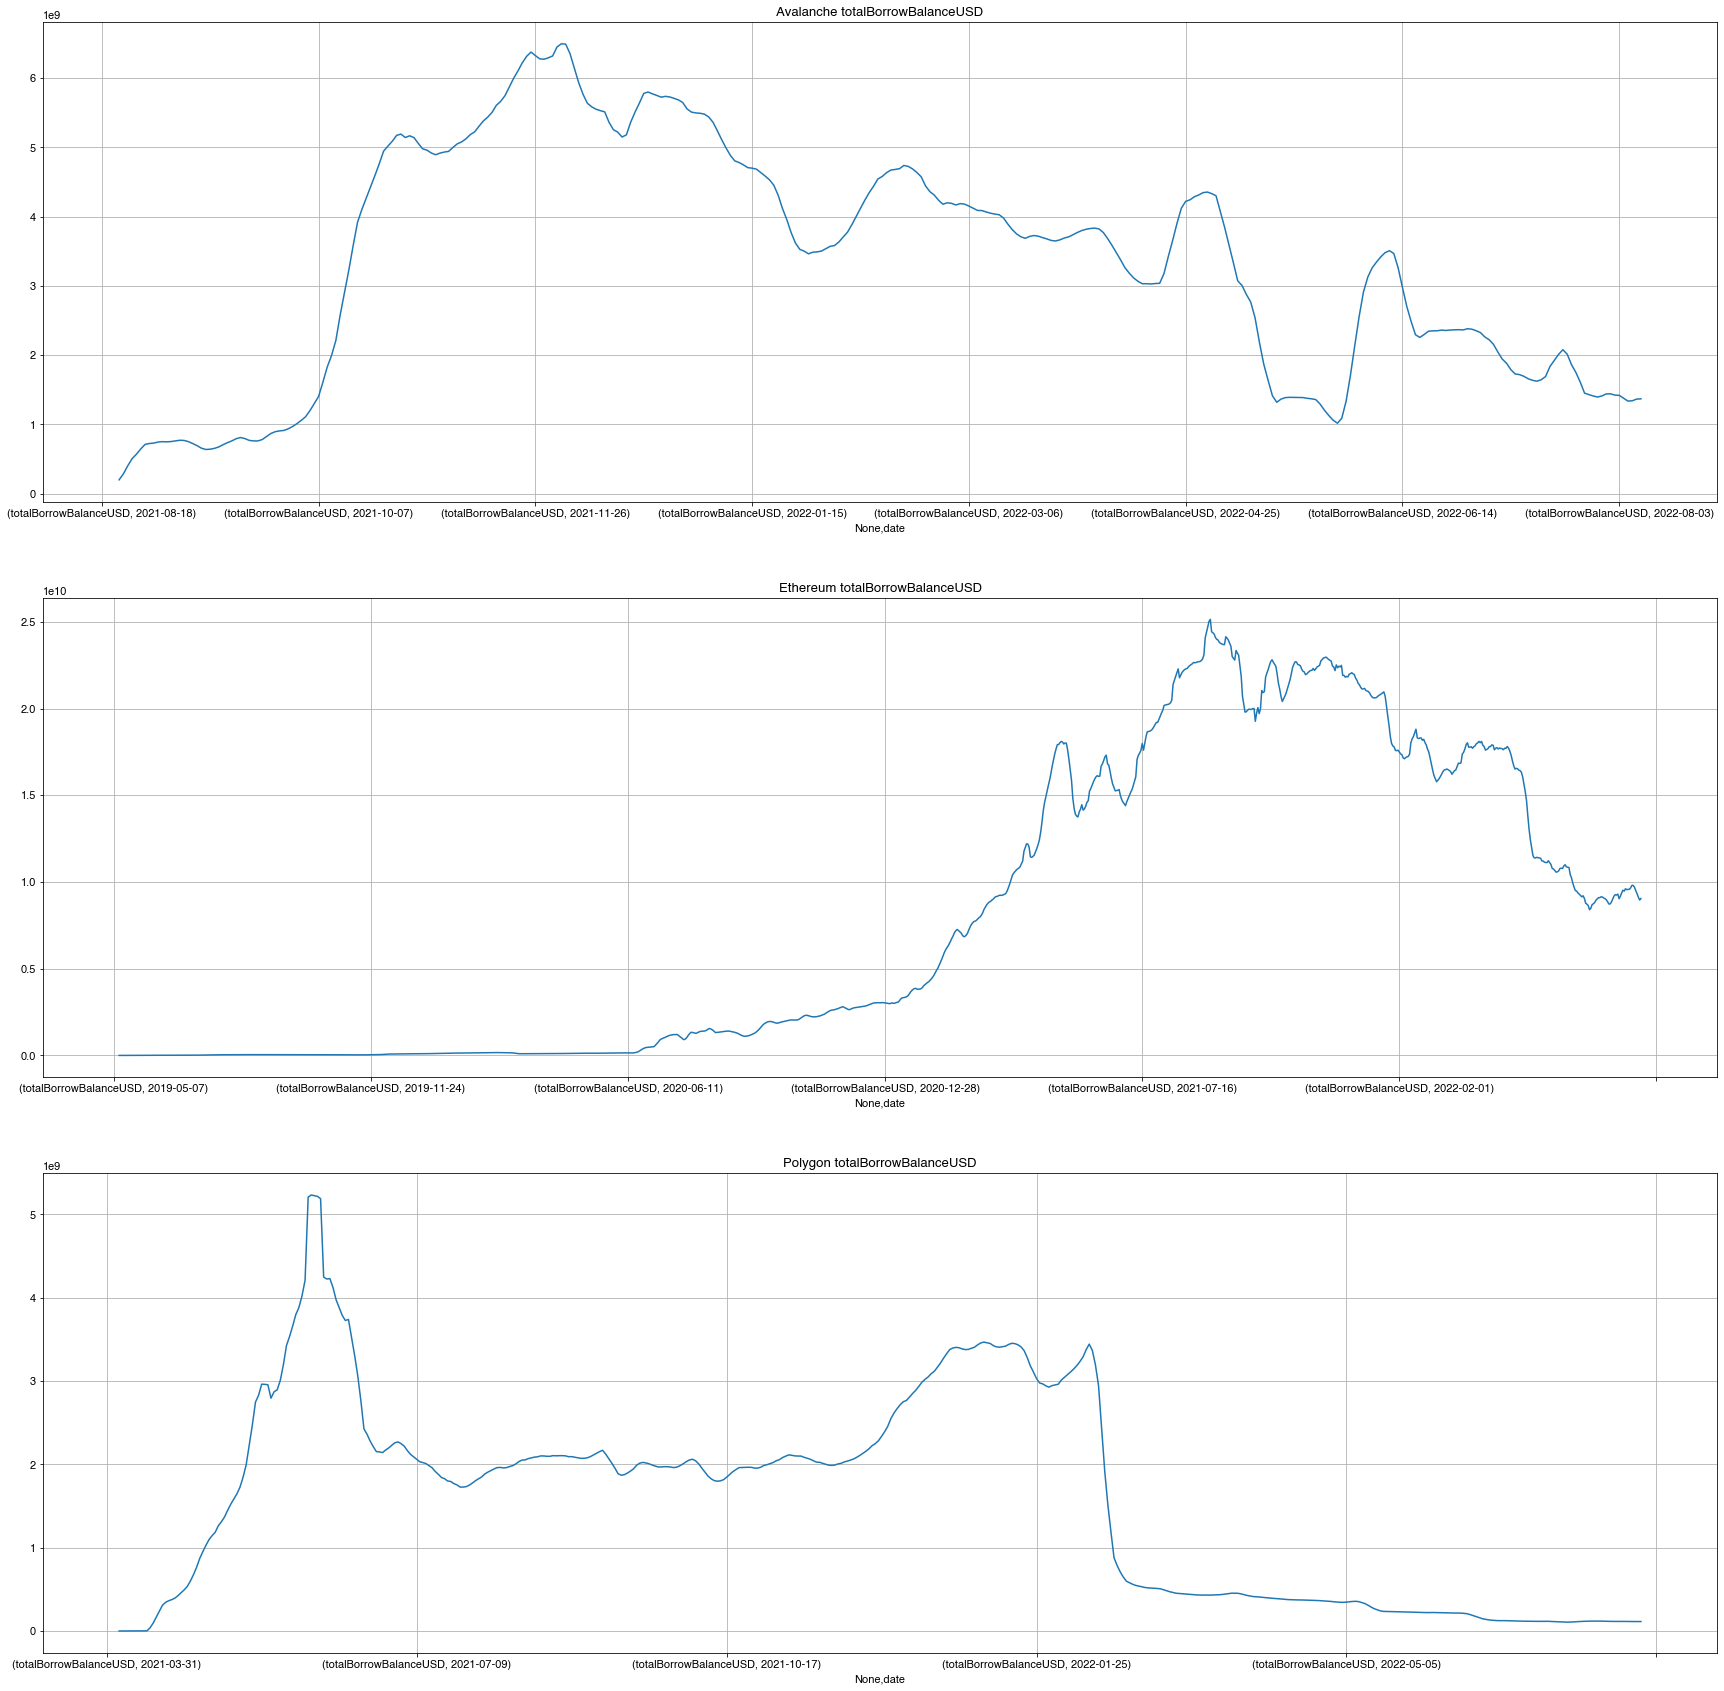

In [232]:
plot_agg_lending('totalBorrowBalanceUSD')

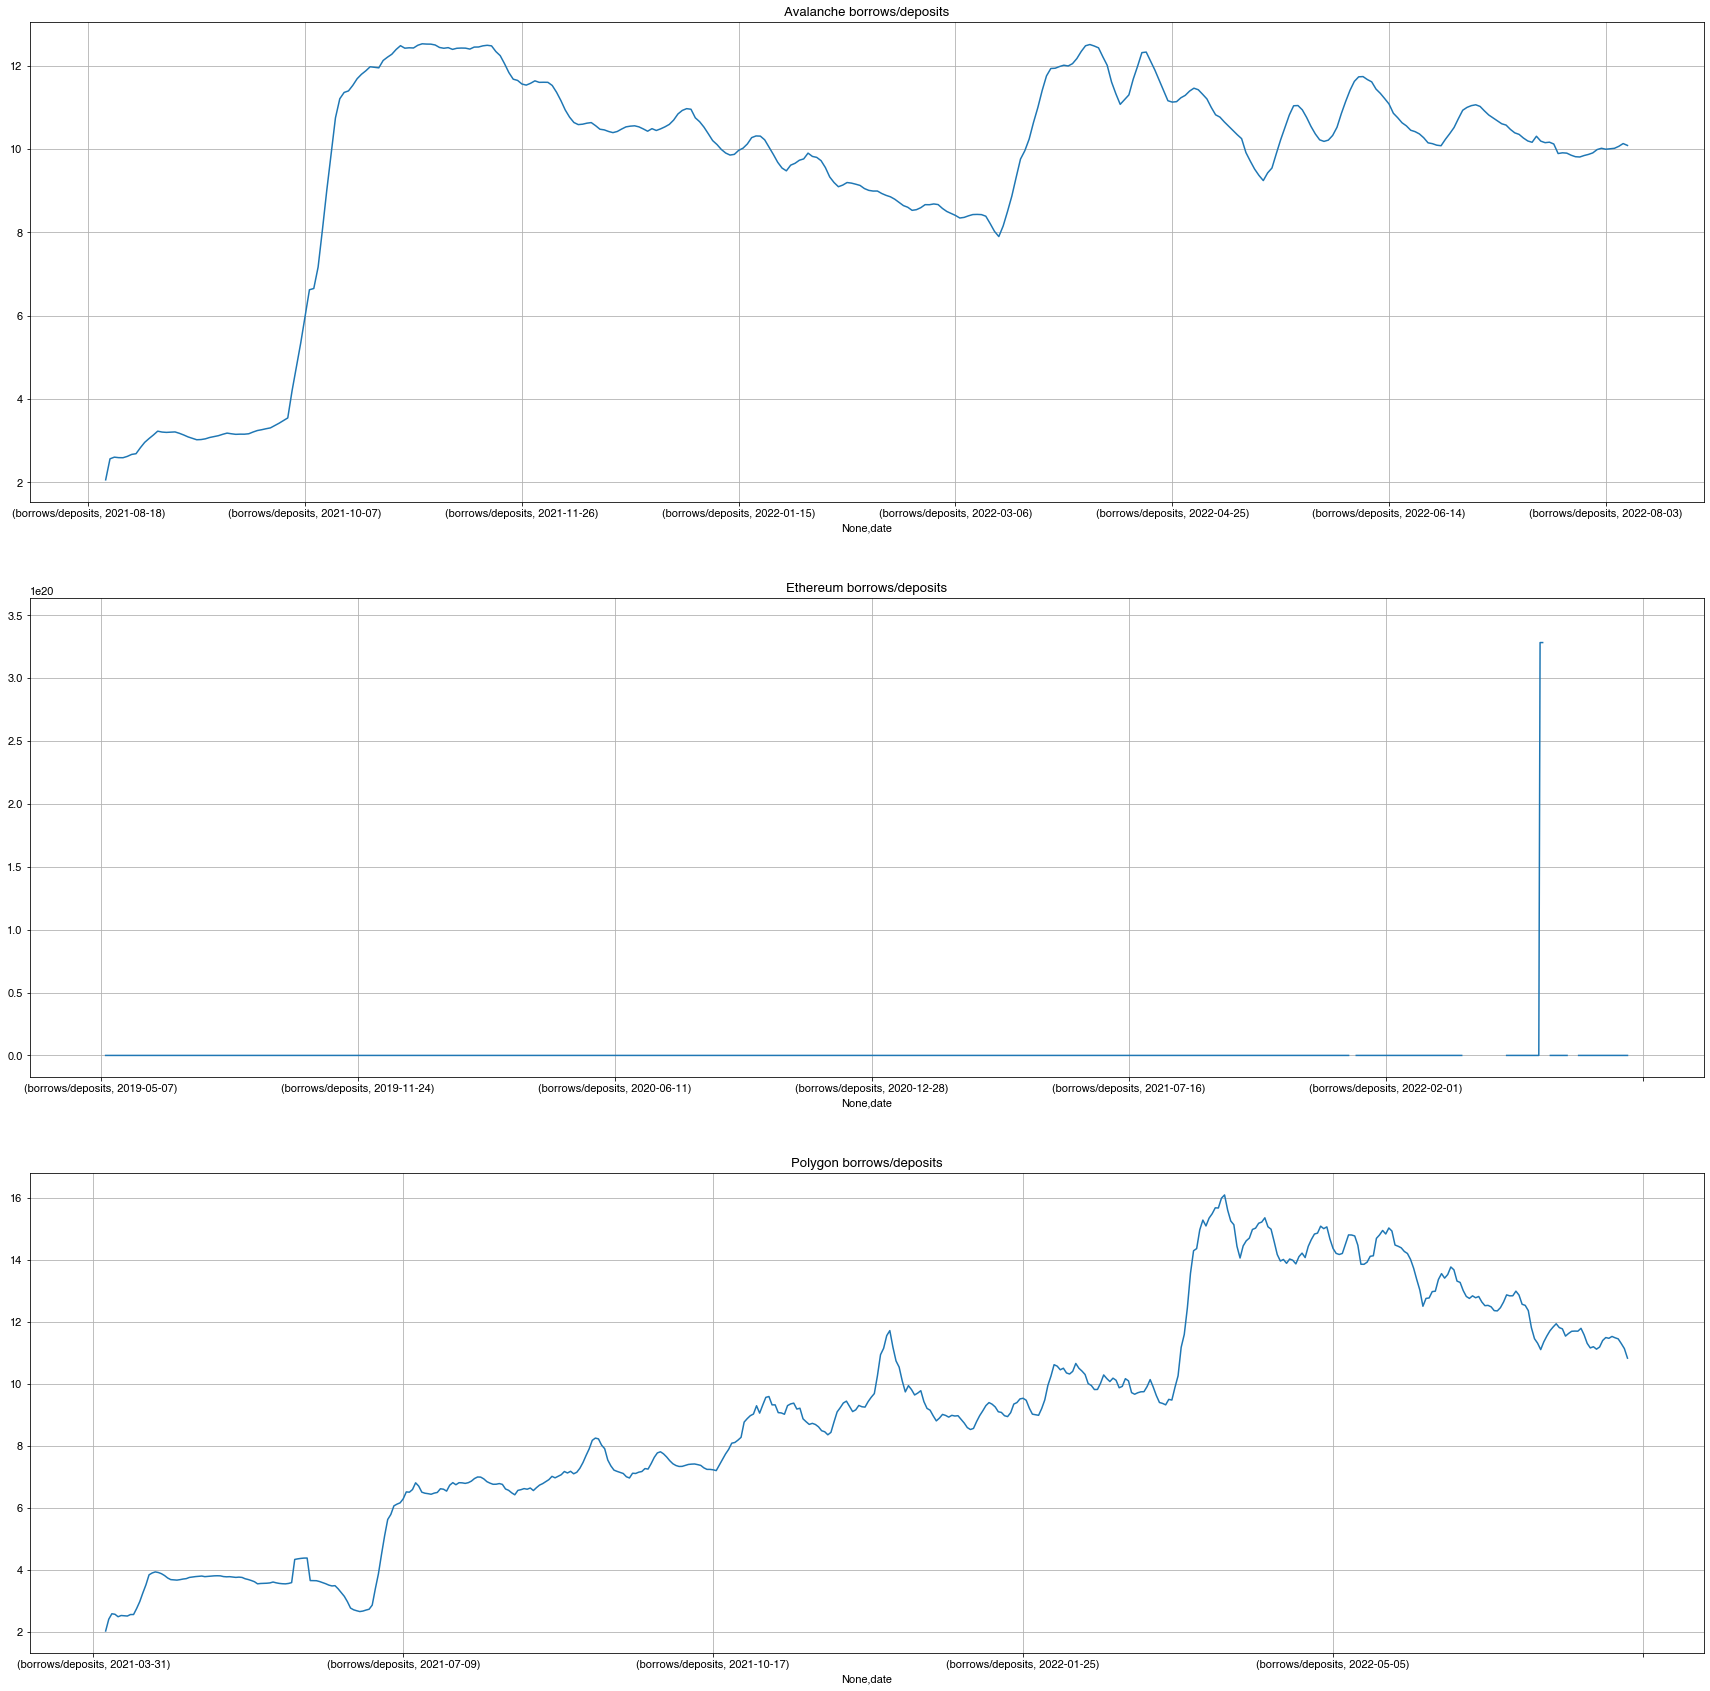

In [233]:
plot_agg_lending('borrows/deposits')

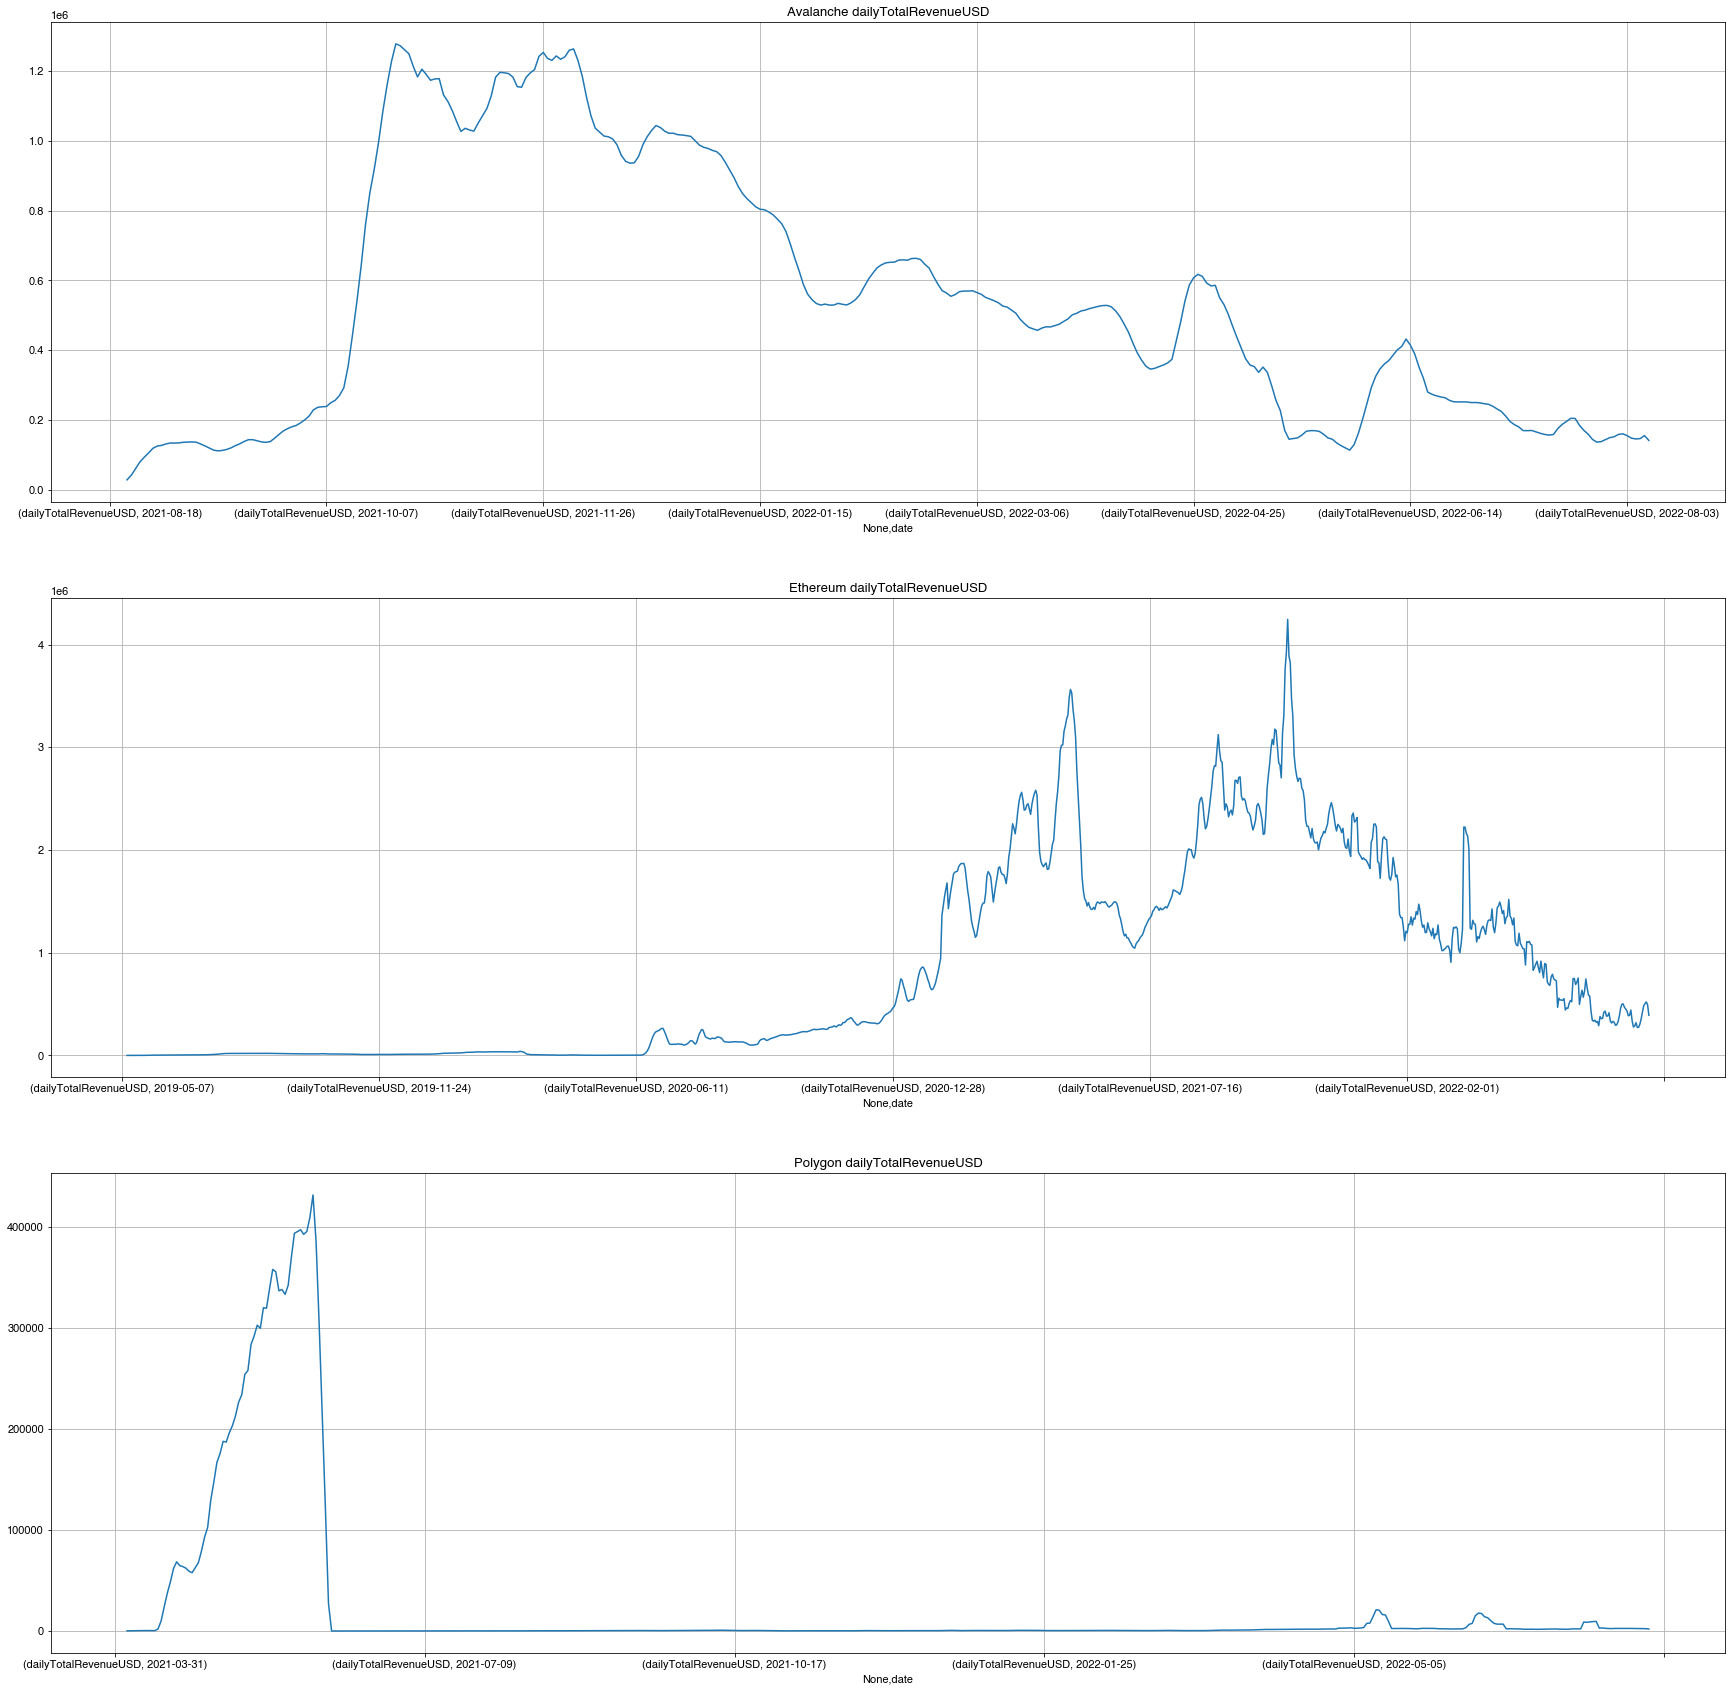

In [234]:
plot_agg_lending('dailyTotalRevenueUSD')

In [243]:
def plot_agg_dex(metric):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
    fig 
    subplots = [ax1,ax2,ax3]
    chains = ['Avalanche','Ethereum','Polygon']
    for k in range(3):
        curr_chain=chains[k]
        curr_df = dex_df[(dex_df['chain']==curr_chain)]
        curr_df = curr_df.groupby(['date'])[metric].sum().to_frame().unstack(level=1).abs()
        curr_df.rolling(5).mean().plot(figsize=(30,30),ax=subplots[k],title = curr_chain+' '+metric)
        subplots[k].grid()

In [288]:
stable_df

,# TXs,Agg. # TXs,Unique Senders,Unique Receivers,Unique Users,Vol (Native),Agg. Vol (Native),Mints (Native),Burns (Native),Supply (Native),token,date,chain,supply_ntv,velocity
13848,339.0,339.0,99.0,101.0,114.0,2.807153e+06,2.807153e+06,3.234735e+05,-4.472261e+05,-1.237526e+05,UST,2021-01-01,ethereum,3.861025e+07,0.072705
8077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,USDC,2021-01-01,avalanche,NaN,NaN
1153,458.0,458.0,49.0,53.0,60.0,9.855003e+04,9.855003e+04,2.110000e+03,-4.865931e+02,1.623407e+03,DAI,2021-01-01,polygon,1.623407e+03,60.705690
2488,2204.0,2204.0,361.0,346.0,387.0,7.401385e-06,7.401385e-06,1.319326e-06,-3.445669e-08,1.284869e-06,USDC,2021-01-01,polygon,1.284869e-06,5.760420
7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,USDC.e,2021-01-01,avalanche,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,242.0,397957.0,121.0,129.0,167.0,2.045027e+07,6.343403e+10,1.190464e+06,-6.126110e+05,5.723097e+08,TUSD,2022-07-31,ethereum,7.243266e+08,0.028233
12298,53228.0,10862451.0,18608.0,20050.0,27023.0,7.971286e+09,2.101543e+12,4.679903e+07,-6.965203e+07,7.825803e+09,USDC,2022-07-31,ethereum,3.898391e+10,0.204476
13272,223.0,718725.0,81.0,104.0,135.0,4.510553e+06,1.120830e+11,2.628478e+05,-2.528377e+05,3.986949e+08,UST,2022-07-31,ethereum,2.005387e+07,0.224922
6924,12609.0,25320.0,2166.0,2287.0,2878.0,2.719100e+07,6.944544e+07,4.893366e+05,-2.020117e+06,5.174186e+05,USDC.e,2022-07-31,avalanche,5.174186e+05,52.551251


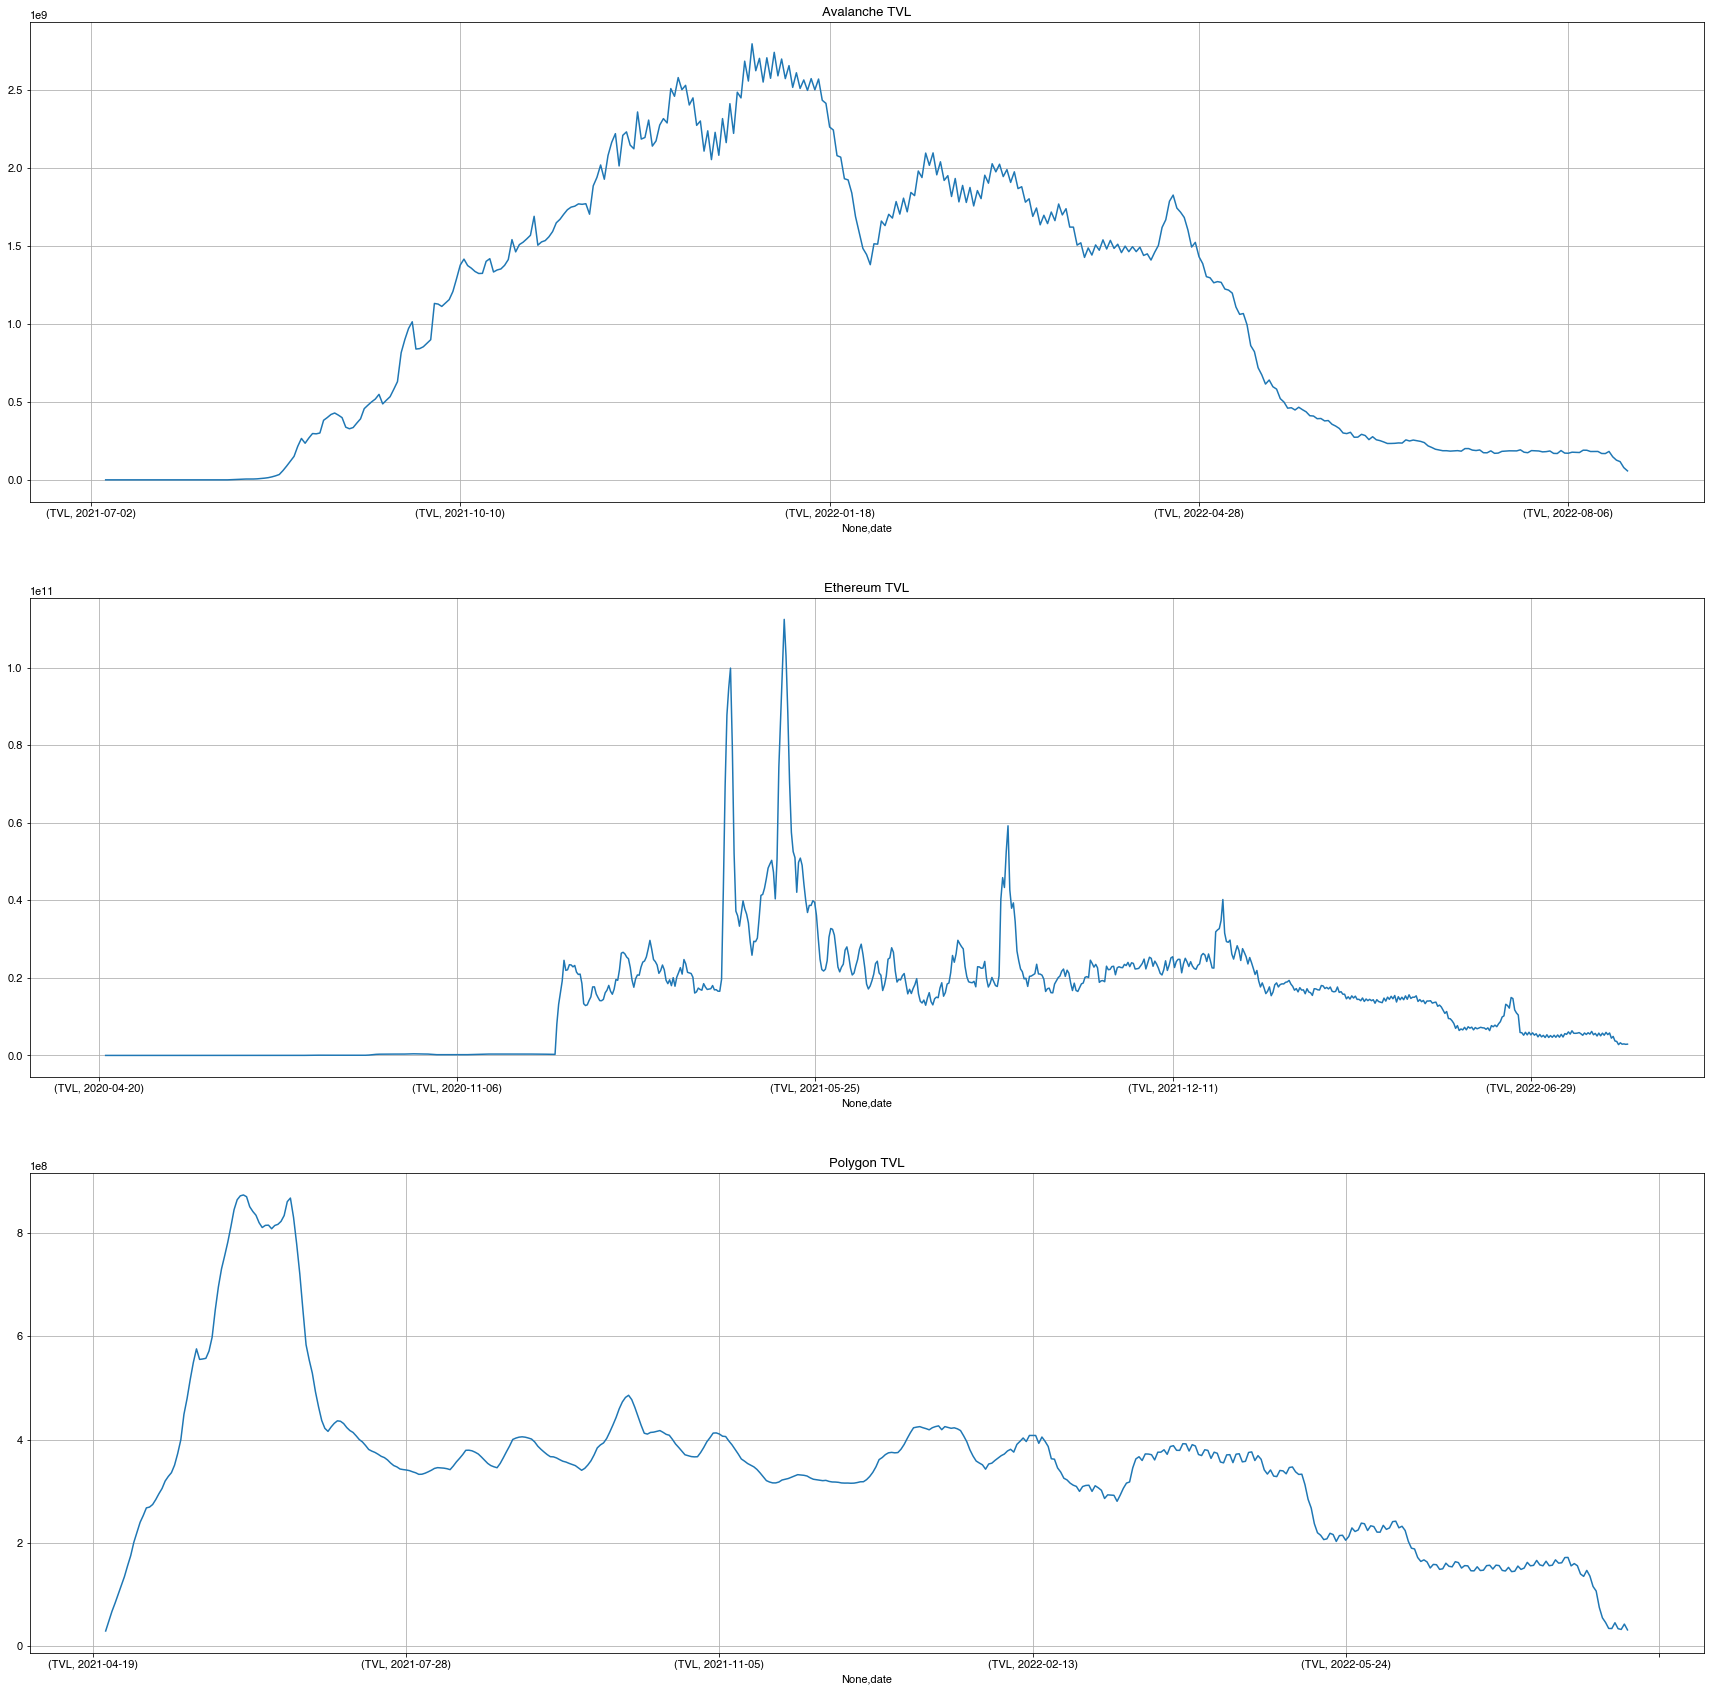

In [244]:
plot_agg_dex('TVL')

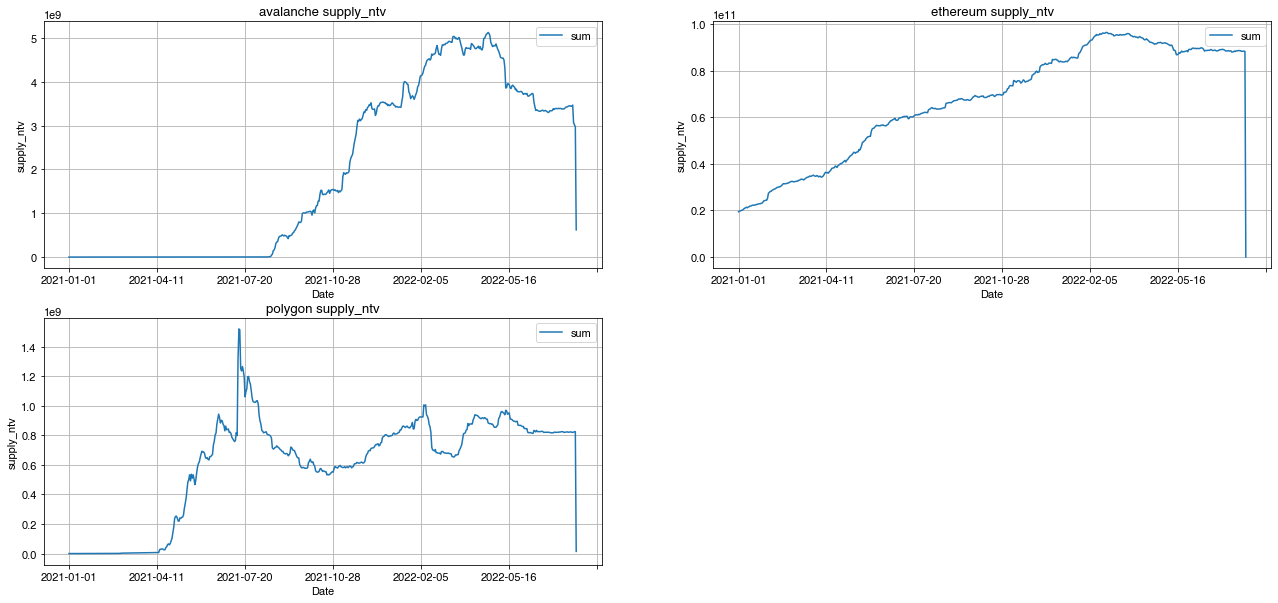

In [246]:
plot_agg_stable('supply_ntv')

In [255]:
def plot_agg_dex():
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
    fig 
    subplots = [ax1,ax2,ax3]
    metric_1 = 'TVL'
    metric_2 = 'supply_ntv'
    chains = ['Avalanche','Ethereum','Polygon']
    for k in range(3):
        curr_chain=chains[k]
        ax = subplots[k]
        curr_df = dex_df[(dex_df['chain']==curr_chain)]
        temp_df = stable_df[stable_df['chain']==curr_chain]
        curr_df = curr_df.groupby(['date'])[metric_1].sum().to_frame().unstack(level=1).abs()
        temp_df = temp_df.groupby(['date'])[metric_2].sum().to_frame().unstack(level=1).abs()
        curr_df.plot(figsize=(30,30),ax=ax,title = curr_chain+' '+metric_1)
        temp_df.plot(figsize=(30,30),ax=ax,title = curr_chain+' '+metric_2)
        subplots[k].grid()

In [351]:
def plot_TVLbySupply():
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
    fig 
    subplots = [ax1,ax2,ax3]

    chains = ['Avalanche','Ethereum','Polygon']
    dfs = []

    for k in range(3):
        curr_chain=chains[k]
        ax = subplots[k]

        tvl_df = dex_df[(dex_df['chain']==curr_chain)]
        tvl_df = tvl_df[(tvl_df['date'] >= '2021-01-01') & (tvl_df['date'] <= '2022-07-31')]
        tvl_df = tvl_df.groupby(['date'])['TVL'].sum().to_frame().abs()
        dfs.append(tvl_df)

        #tvl_df.plot()
        tvl_df

        supply_df = stable_df[(stable_df['chain']==curr_chain.lower())]
        supply_df = supply_df[(supply_df['date'] >= '2021-01-01') & (supply_df['date'] <= '2022-07-31')]
        supply_df = supply_df.groupby(['date'])['supply_ntv'].sum().to_frame().abs()
        dfs.append(supply_df)
        #supply_df.plot()

        tvl_supply = tvl_df
        tvl_supply['supply'] = supply_df.supply_ntv
        tvl_supply['tvl/supply'] = tvl_df['TVL']/tvl_df['supply']
        tvl_supply.rolling(5).mean().plot(y = 'tvl/supply', figsize = (22,22), ax = ax, title = curr_chain+ ' TVL/Supply')
        subplots[k].grid()
        #subplots[k].axvline(x = '2021-01-01', color = 'r', linestyle = '-')

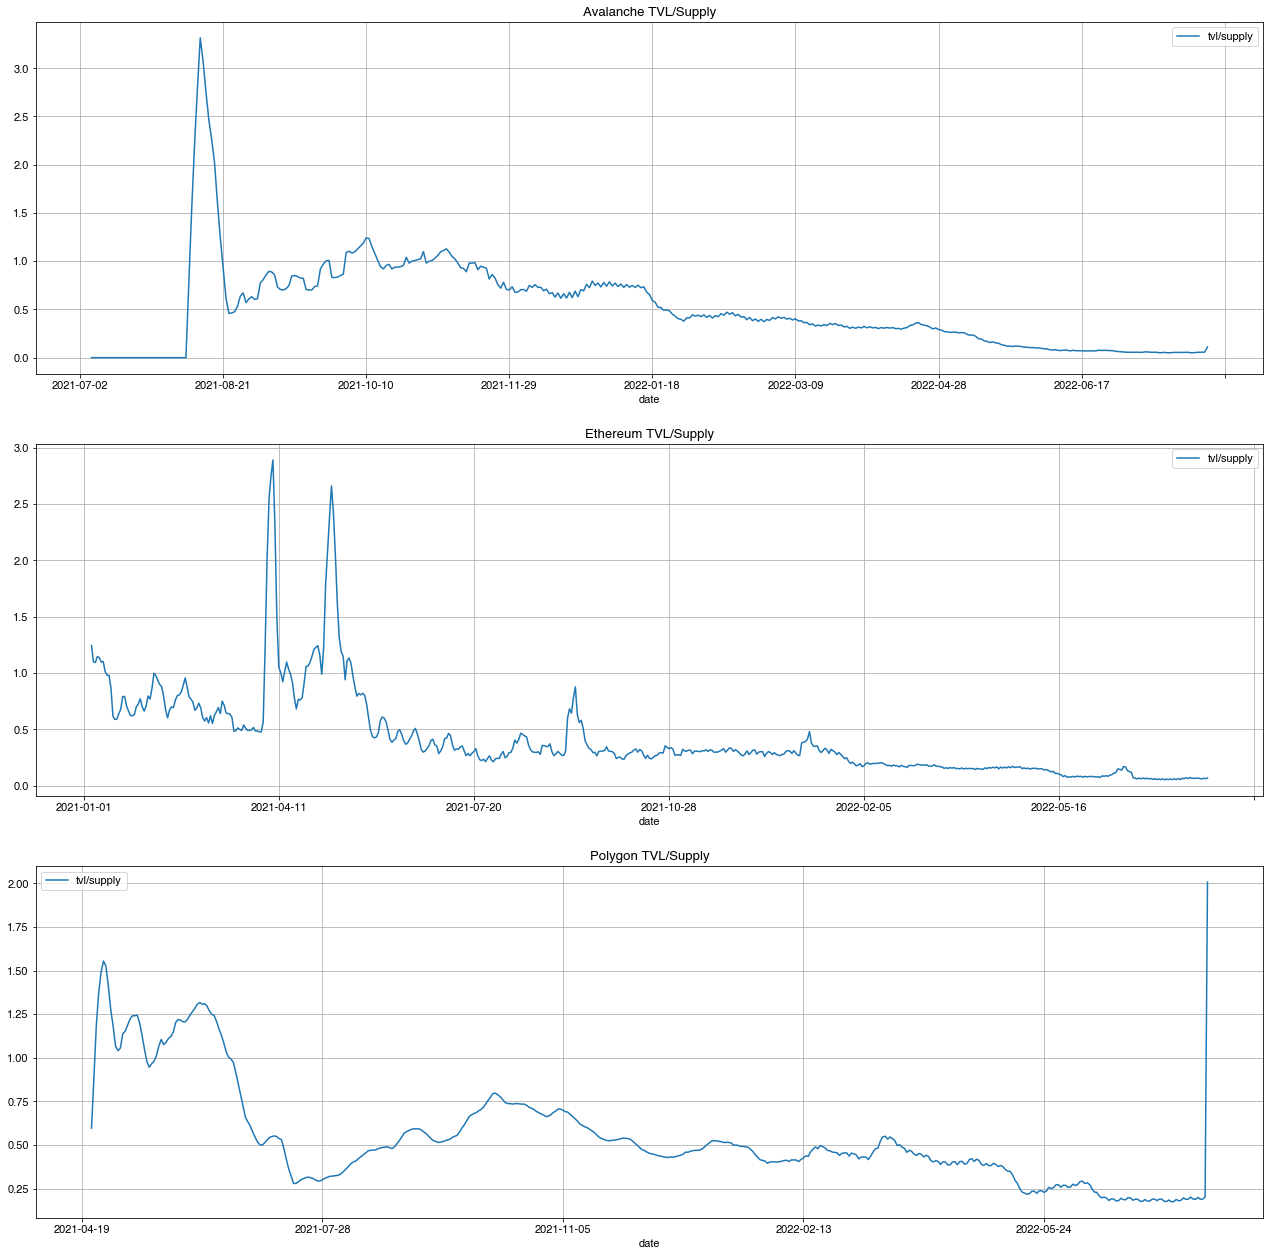

In [352]:

plot_TVLbySupply()


In [393]:
def get_price(coin):
    dates = pd.date_range(start='2021-01-01', end='2022-07-31')
    price = [0.00]*len(dates)

    for k in range(len(dates)):
        data = cg.get_coin_history_by_id(id=coin,date=dates[k].strftime("%d-%m-%Y"), localization='false', vs_currency = 'usd')
        price[k] = data['market_data']['current_price']['usd']
        time.sleep(0.21)
    df = pd.DataFrame({'date':dates, 'price':price})
    return df

In [394]:
eth_df = get_price('ethereum')
eth_df

ValueError: {'status': {'error_code': 429, 'error_message': "You've exceeded the Rate Limit. Please visit https://www.coingecko.com/en/api/pricing to subscribe to our API plans for higher rate limits."}}